# Within Method Type Comparisons

This notebooks runs a set of comparisons across methods, within method types (eg. comparing different complexity measures to each other). 

It does so for the following method categories (that have multiple methods):
- Fluctuations
- Fractal Dimension
- Complexity
- Entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_comparisons
from apm.analysis import compute_all_corrs
from apm.plts import plot_dots
from apm.plts.multi import plot_results_all
from apm.plts.settings import EXT, COLORS
from apm.plts.utils import make_axes
from apm.methods import (hurst, dfa, higuchi_fd, katz_fd, petrosian_fd,
                         hjorth_mobility, hjorth_complexity, lempelziv, lyapunov,
                         app_entropy, sample_entropy, perm_entropy, wperm_entropy)
from apm.methods.settings import (HURST_PARAMS, DFA_PARAMS,
                                  HFD_PARAMS, KFD_PARAMS, PFD_PARAMS,
                                  HJM_PARAMS, HJC_PARAMS, LZ_PARAMS, LY_PARAMS,
                                  AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, WPE_ENT_PARAMS)
from apm.sim.settings import SIM_PARAMS_COMB
from apm.sim.params import sampler
from apm.utils import print_corr_combs

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for running comparisons
RETURN_SIM_PARAMS = True

In [6]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '41_within_comp'

In [7]:
# Set the number of simulations to run
N_SIMS = 1000

In [8]:
# Define ranges to sample parameters from
samplers = {'update_comb_exp' : sampler(np.arange(-2.5, 0.1, 0.1)),
            'update_pow' : sampler(np.arange(0, 1.1, 0.1),
                                   probs = [0.30] + ([0.07] * 10)),
            'update_freq' : sampler(np.arange(5, 36, 1))}

In [9]:
# Collect together info & plot settings 
dot_kwargs = {'s' : 25, 'alpha' : 0.25}

## Fluctuations

In [10]:
# Define measures to apply - fluctuations
measures_fluc = {
    hurst : HURST_PARAMS, 
    dfa : DFA_PARAMS,
}

In [11]:
# Run simulations, comparing fluctuation measures
results_fluc, all_sim_params_fluc = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_fluc, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [12]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fluc = compute_all_corrs(results_fluc)
all_corrs_osc_fluc = compute_all_corrs(results_fluc, all_sim_params_fluc['has_osc'].values)
all_corrs_no_osc_fluc = compute_all_corrs(results_fluc, ~all_sim_params_fluc['has_osc'].values)

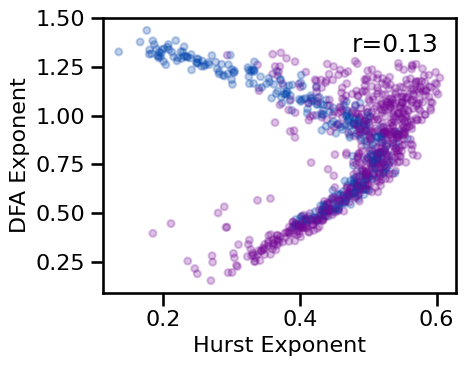

In [13]:
# Plot comparisons
cs = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fluc.has_osc]
plot_dots(results_fluc['hurst'], results_fluc['dfa'], tposition='tr', c=cs, **dot_kwargs,
          xlabel='Hurst Exponent', ylabel='DFA Exponent', figsize=(5, 4),
          save_fig=SAVE_FIG, file_name='fluc_comp' + EXT, file_path=FIGPATH)

In [14]:
# Print correlations between different fluctuation measures
print_corr_combs(all_corrs_fluc)

Correlations:
  HE     & DFA   :   r=+0.128  CI[+0.047, +0.207],  p=0.000


## Fractal Dimension

In [15]:
# Define measures to apply - fractal dimension
measures_fd = {
    higuchi_fd : HFD_PARAMS,
    katz_fd : KFD_PARAMS,
    petrosian_fd : PFD_PARAMS,
}

In [16]:
# Run simulations, comparing fractal dimension measures
results_fd, all_sim_params_fd = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_fd, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [17]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_fd = compute_all_corrs(results_fd)
all_corrs_osc_fd = compute_all_corrs(results_fd, all_sim_params_fd['has_osc'].values)
all_corrs_no_osc_fd = compute_all_corrs(results_fd, ~all_sim_params_fd['has_osc'].values)

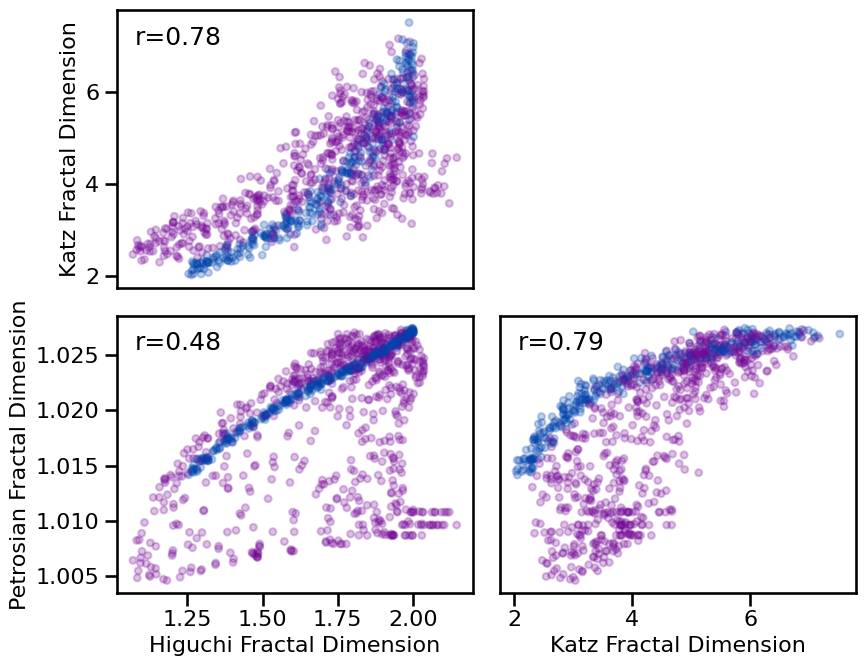

In [18]:
# Plot comparisons across fractal dimension measures
cs = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_fd.has_osc]
plot_results_all(results_fd, figsize=(9, 7), tposition='tl', c=cs, **dot_kwargs,
                 save_fig=SAVE_FIG, file_name='fractal_comp' + EXT, file_path=FIGPATH)

In [19]:
# Print correlations between different fractal measures
print_corr_combs(all_corrs_fd)

Correlations:
  HFD    & KFD   :   r=+0.778  CI[+0.747, +0.806],  p=0.000
  HFD    & PFD   :   r=+0.477  CI[+0.415, +0.535],  p=0.000
  KFD    & PFD   :   r=+0.786  CI[+0.762, +0.807],  p=0.000


## Complexity

In [20]:
# Define measures to apply - complexity
measures_cp = {
    hjorth_mobility : HJM_PARAMS,
    hjorth_complexity : HJC_PARAMS,
    lempelziv : LZ_PARAMS,
    lyapunov : LY_PARAMS,
}

In [21]:
# Run simulations, comparing complexity measures
results_cp, all_sim_params_cp = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_cp, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [22]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_cp = compute_all_corrs(results_cp)
all_corrs_osc_cp = compute_all_corrs(results_cp, all_sim_params_cp['has_osc'].values)
all_corrs_no_osc_cp = compute_all_corrs(results_cp, ~all_sim_params_cp['has_osc'].values)

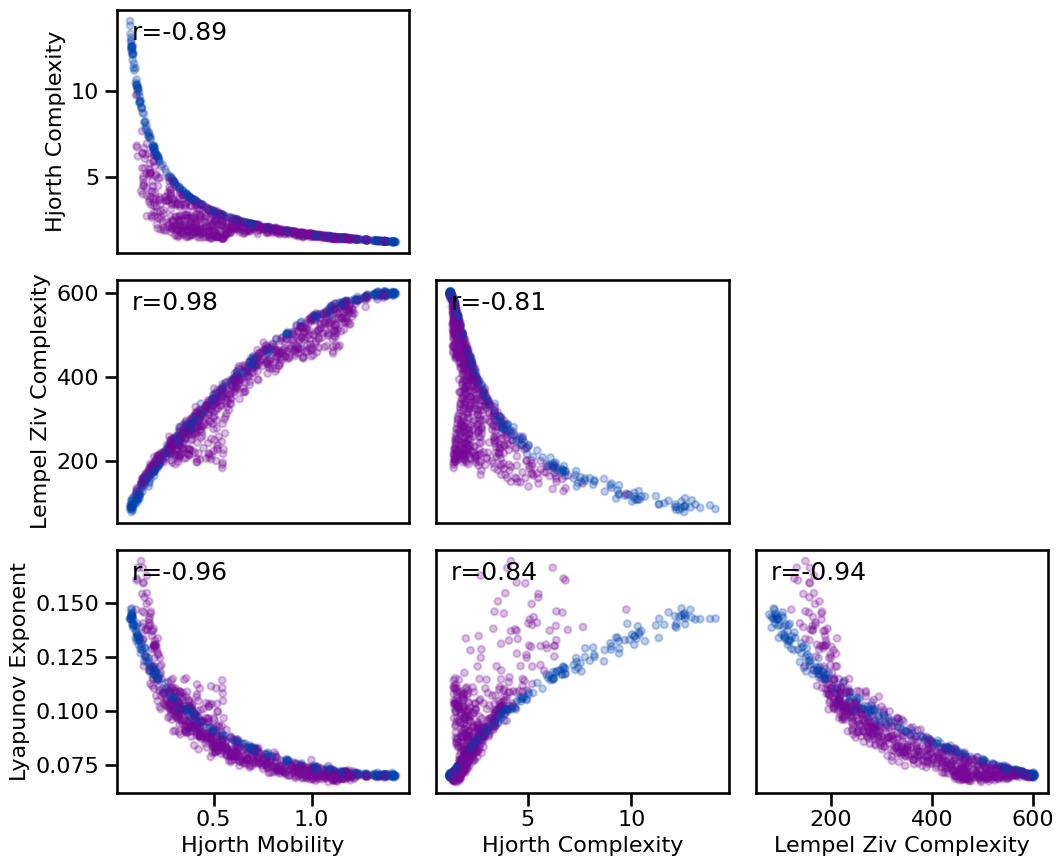

In [23]:
# Plot comparisons across complexity measures
cs = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_cp.has_osc]
plot_results_all(results_cp, figsize=(11, 9), tposition='tl', c=cs, **dot_kwargs,
                 save_fig=SAVE_FIG, file_name='compl_comp' + EXT, file_path=FIGPATH)

In [24]:
# Print correlations between different complexity measures
print_corr_combs(all_corrs_cp)

Correlations:
  HJM    & HJC   :   r=-0.887  CI[-0.907, -0.865],  p=0.000
  HJM    & LZC   :   r=+0.979  CI[+0.974, +0.983],  p=0.000
  HJM    & LLE   :   r=-0.961  CI[-0.966, -0.954],  p=0.000
  HJC    & LZC   :   r=-0.814  CI[-0.846, -0.779],  p=0.000
  HJC    & LLE   :   r=+0.840  CI[+0.810, +0.867],  p=0.000
  LZC    & LLE   :   r=-0.941  CI[-0.949, -0.931],  p=0.000


## Entropy

In [25]:
# Define measures to apply - entropy
measures_ent = {
    app_entropy : AP_ENT_PARAMS,
    sample_entropy : SA_ENT_PARAMS,
    perm_entropy : PE_ENT_PARAMS,
    wperm_entropy : WPE_ENT_PARAMS,
}

In [26]:
# Run simulations, comparing entropy measures
results_ent, all_sim_params_ent = run_comparisons(\
    sim_combined, SIM_PARAMS_COMB, measures_ent, samplers, N_SIMS, RETURN_SIM_PARAMS)

In [27]:
# Compute correlations across all measures, as well as with & without oscillations
all_corrs_ent = compute_all_corrs(results_ent)
all_corrs_osc_ent = compute_all_corrs(results_ent, all_sim_params_ent['has_osc'].values)
all_corrs_no_osc_ent = compute_all_corrs(results_ent, ~all_sim_params_ent['has_osc'].values)

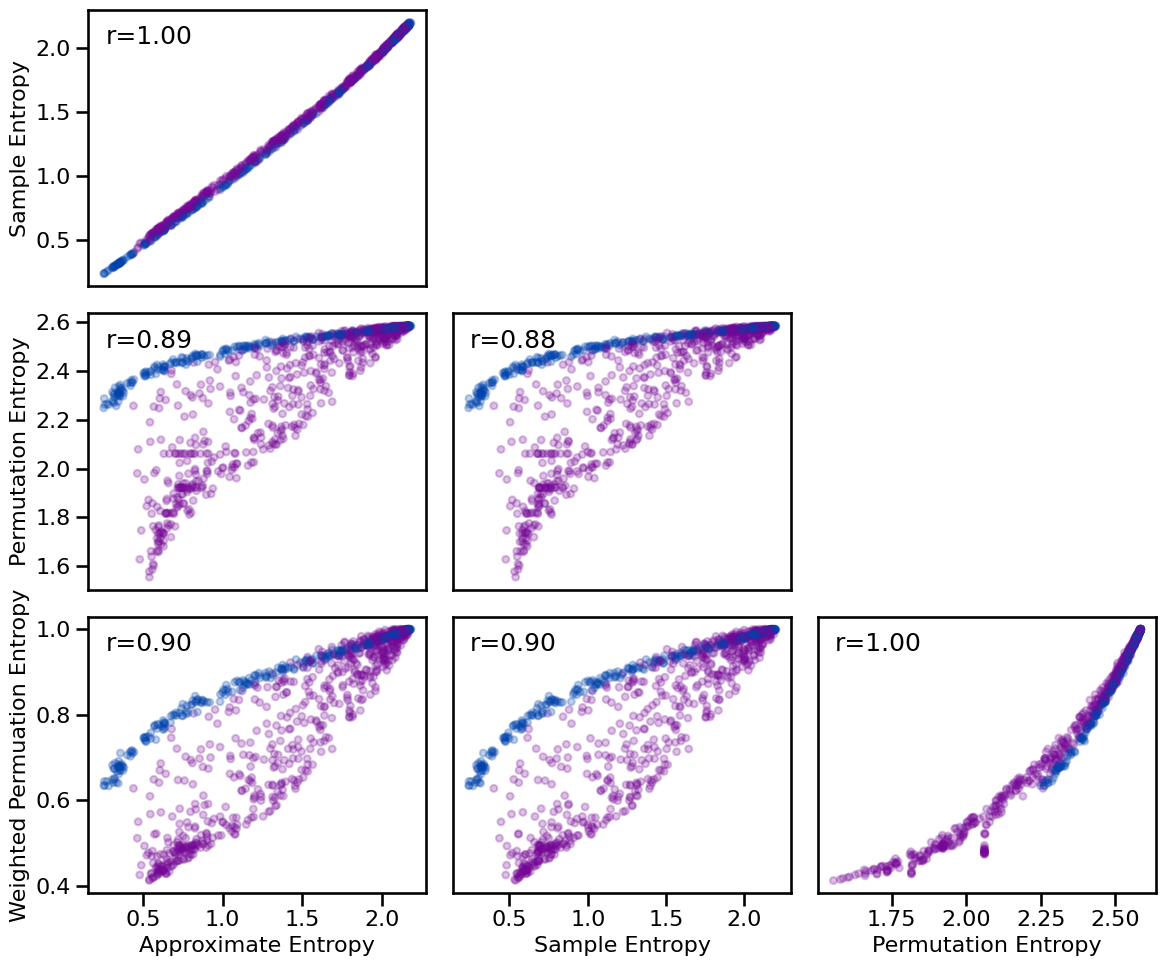

In [28]:
# Plot comparisons across entropy measures
cs = [COLORS['CM'] if osc else COLORS['AP'] for osc in all_sim_params_ent.has_osc]
plot_results_all(results_ent, figsize=(12, 10), tposition='tl', c=cs, **dot_kwargs,
                 save_fig=SAVE_FIG, file_name='ent_comp' + EXT, file_path=FIGPATH)

In [29]:
# Print correlations between different entropy measures
print_corr_combs(all_corrs_ent)

Correlations:
  ApEn   & SampEn:   r=+0.999  CI[+0.999, +0.999],  p=0.000
  ApEn   & PeEn  :   r=+0.886  CI[+0.871, +0.899],  p=0.000
  ApEn   & wPeEn :   r=+0.905  CI[+0.892, +0.915],  p=0.000
  SampEn & PeEn  :   r=+0.876  CI[+0.860, +0.890],  p=0.000
  SampEn & wPeEn :   r=+0.896  CI[+0.882, +0.907],  p=0.000
  PeEn   & wPeEn :   r=+0.998  CI[+0.997, +0.998],  p=0.000
